## Sprint 9: Machine Learning Regressions
___

### - Exercises 1: Create at least three different regression models to try to predict DelayedFlights.csv's flight delay (ArrDelay) as best you can.
### - Exercise 2: Compare them based on MSE and R2.
### - Exercises 3: Train them using the different parameters they support.
### - Exercises 4: Compare your performance using the traint / test approach or using all data (internal validation).

### The columns of the dataset are:

+ Year = 2008
+ Month = 1-12
+ DayofMonth = 1-31
+ DayOfWeek = 1 (Monday) - 7 (Sunday)
+ DepTime = actual departure time (local, hhmm)
+ CRSDepTime = scheduled departure time (local, hhmm)
+ ArrTime = actual arrival time (local, hhmm)
+ CRSArrTime = scheduled arrival time (local, hhmm)
+ UniqueCarrier = unique carrier code
+ FlightNum = flight number
+ TailNum = plane tail number: aircraft registration, unique aircraft identifier
+ ActualElapsedTime = in minutes
+ CRSElapsedTime = in minutes
+ AirTime = in minutes
+ ArrDelay = arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized + + + + Reservations Systems (CRS).
+ DepDelay = departure delay, in minutes
+ Origin = origin IATA airport code
+ Dest = destination IATA airport code
+ Distance = in miles
+ TaxiIn = taxi in time, in minutes
+ TaxiOut = taxi out time in minutes
+ Cancelled = *was the flight cancelled
+ CancellationCode = reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
+ Diverted = 1 = yes, 0 = no
+ CarrierDelay = in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
+ WeatherDelay = in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
+ NASDelay = in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
+ SecurityDelay = in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
+ LateAircraftDelay = in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

### We are going to do:
### -Linear Regression for our numerical variables, Random Forest Regression, this algorithm can be used for both classifications and regression task. It provides higher accuracy through cross validation.

### -Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data.
 
### -Lasso Regression, In Statistics and Machine Learning, Lasso (least absolute shrinkage and selection operator) is a regression analysis method that performs variable selection and regularization to improve the accuracy and interpretability of the statistical model produced by it.

In [114]:
#Import our librarys:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import make_pipeline



In [7]:
df = pd.read_csv('DelayedFlights.csv', index_col=0)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [8]:
df['Cancelled'].unique()

array([0, 1])

In [9]:
#Grab only the flights that aren´t cancelled, because if its cancelled we can´t analyse the delay reasons:

df2 = df[df['Cancelled']== 0]

In [10]:
df2[df2.isna()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7009717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7009718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7009726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Couting the nulls values:
df2.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                6477
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      7754
CRSElapsedTime          198
AirTime                7754
ArrDelay               7754
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 6477
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         688637
WeatherDelay         688637
NASDelay             688637
SecurityDelay        688637
LateAircraftDelay    688637
dtype: int64

As we can see we got few values with Nan, that we going to fill with 0 because we want to keep the raws.
ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).


In [12]:
#Fill the Nan values with 0:

df2 = df2.fillna(0)

In [13]:

# Counting null values:

df2.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Now that we have our dataset clean, we can start with our Machine Learning Models, and try to predict the ArrDelay.
___

In [14]:
#Isolate our independent variables:
x = df2.drop(['ArrDelay'], axis= 1)
x.shape

(1936125, 28)

In [15]:
#Isolate our dependent variable:

y= df2['ArrDelay']
y.shape

(1936125,)

In [16]:
df2.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [17]:
#Dropping some columns that we are not interested to work with.

x.drop(['Year','Cancelled', 'CancellationCode', 'Diverted', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'NASDelay', 'CarrierDelay', 'WeatherDelay', 'LateAircraftDelay'], axis=1, inplace=True)


In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936125 entries, 0 to 7009727
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   DepTime            float64
 1   CRSDepTime         int64  
 2   ArrTime            float64
 3   CRSArrTime         int64  
 4   ActualElapsedTime  float64
 5   CRSElapsedTime     float64
 6   AirTime            float64
 7   DepDelay           float64
 8   Distance           int64  
 9   TaxiIn             float64
 10  TaxiOut            float64
 11  SecurityDelay      float64
dtypes: float64(9), int64(3)
memory usage: 192.0 MB


In [19]:
#Lets see the correlation between the variables:

corr_df2 = x.corr()

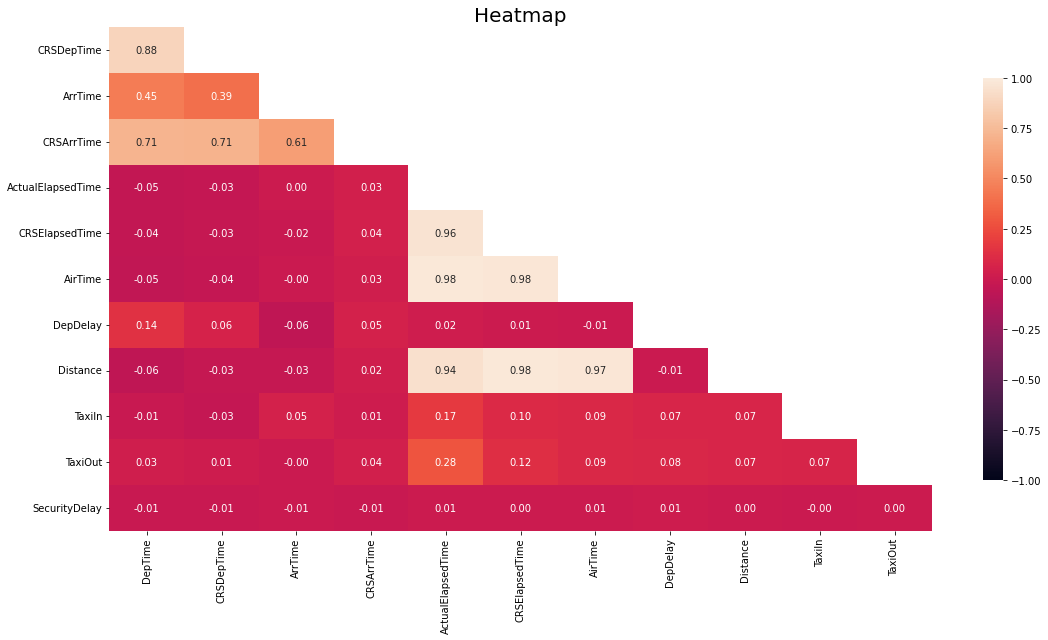

In [112]:
#Lets plot a HeatMap:
np.ones_like(corr_df2, dtype=bool)
mask = np.triu(np.ones_like(corr_df2, dtype=bool))
corr_df2
fig, ax = plt.subplots(figsize=(16,9))# mask

mask = np.triu(np.ones_like(corr_df2, dtype=bool))# adjust mask and df

mask = mask[1:, :-1]

corr = corr_df2.iloc[1:,:-1].copy()# plot heatmap

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})# yticks

plt.yticks(rotation=0)
plt.title("Heatmap",  fontsize=20)
plt.tight_layout()
plt.show()

In [21]:
x_num= x.select_dtypes(include=['float64','int64'])

In [22]:
#Check the columns of my X:
X = x
X.head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,SecurityDelay
0,2003.0,1955,2211.0,2225,128.0,150.0,116.0,8.0,810,4.0,8.0,0.0
1,754.0,735,1002.0,1000,128.0,145.0,113.0,19.0,810,5.0,10.0,0.0
2,628.0,620,804.0,750,96.0,90.0,76.0,8.0,515,3.0,17.0,0.0
4,1829.0,1755,1959.0,1925,90.0,90.0,77.0,34.0,515,3.0,10.0,0.0
5,1940.0,1915,2121.0,2110,101.0,115.0,87.0,25.0,688,4.0,10.0,0.0


In [23]:
#Split the Dataset between Train and Test:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [24]:
X

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,SecurityDelay
0,2003.0,1955,2211.0,2225,128.0,150.0,116.0,8.0,810,4.0,8.0,0.0
1,754.0,735,1002.0,1000,128.0,145.0,113.0,19.0,810,5.0,10.0,0.0
2,628.0,620,804.0,750,96.0,90.0,76.0,8.0,515,3.0,17.0,0.0
4,1829.0,1755,1959.0,1925,90.0,90.0,77.0,34.0,515,3.0,10.0,0.0
5,1940.0,1915,2121.0,2110,101.0,115.0,87.0,25.0,688,4.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,1250.0,1220,1617.0,1552,147.0,152.0,120.0,30.0,906,9.0,18.0,0.0
7009717,657.0,600,904.0,749,127.0,109.0,78.0,57.0,481,15.0,34.0,0.0
7009718,1007.0,847,1149.0,1010,162.0,143.0,122.0,80.0,689,8.0,32.0,0.0
7009726,1251.0,1240,1446.0,1437,115.0,117.0,89.0,11.0,533,13.0,13.0,0.0


___

### Linear Regression Model:

In [122]:
#Import a Linear Regression Model:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [123]:
print('coef: ',regressor.intercept_)
print(regressor.coef_)

coef:  -1.9523796384870238
[ 5.61629804e-04 -8.29741477e-04 -3.64703577e-04  7.85847463e-05
 -5.62665430e-01 -7.71258541e-01  1.25736031e+00  9.90873711e-01
  8.58177917e-03  1.51907143e+00  1.52642878e+00  2.36267494e-02]


In [124]:
#Lets predict some values:

y_pred = regressor.predict(X_test)

In [125]:
#Plot the values:

df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred.head()

,Actual,Predicted
2310485,-14.0,-9.201925
3438902,35.0,35.573079
4331510,98.0,98.391934
5912982,33.0,33.698595
291182,-19.0,-11.124006


In [126]:
#Evaluate our Model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2_reg = regressor.score(X_test,y_test)
print('R2: ', r2_reg)

Mean Absolute Error: 2.6172156868526115
Mean Squared Error: 53.34994645287158
Root Mean Squared Error: 7.30410476738057
R2:  0.9833761711759936


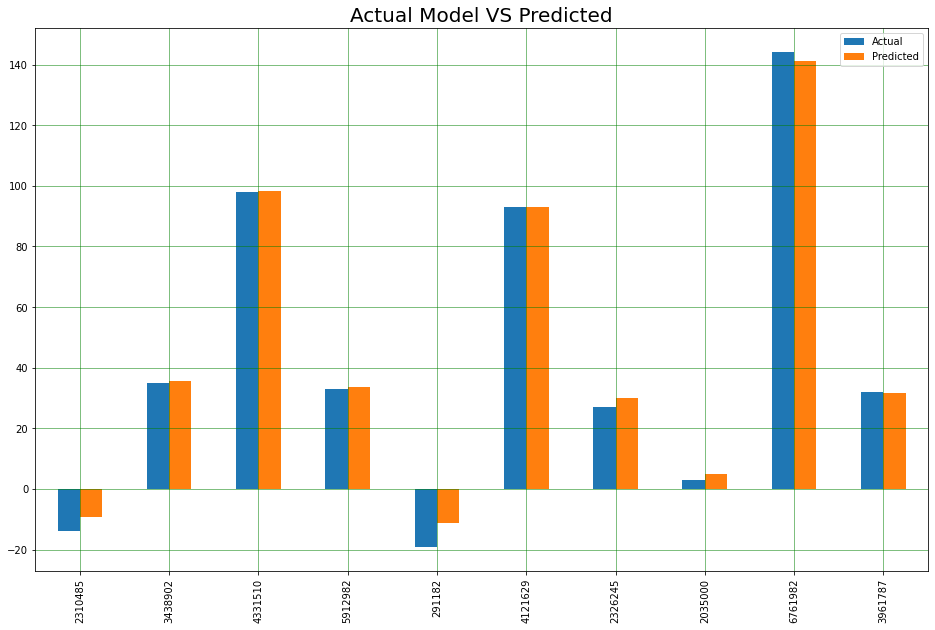

In [30]:
data = df_pred.head(10)
data.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual Model VS Predicted', fontsize=20)
plt.show()

As we can see in the chart the predictions of our model are very accurate.

Tuning the hyperparameters:

In [115]:


# Setup the hyperparameter grid
reg_parameters = {'fit_intercept':[True,False], 'normalize':[True,False],
 'copy_X':[True, False], "positive": [True,False]}
# Instantiate a linear regression:
regressor = LinearRegression()

#instantiate the GridSearchCV object: reg_grid

reg_grid = GridSearchCV(regressor,reg_parameters, cv=3)

# Fit it to the data

reg_grid.fit(X_train,y_train)

# # Predict on the test data: y_pred
y_pred = reg_grid.predict(X_test)



# Print the tuned parameters and score
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2_reg_grid = reg_grid.best_score_
print('Best Score R2: ', r2_reg_grid)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the p

Mean Absolute Error: 2.617215686852605
Mean Squared Error: 53.34994645287158
Root Mean Squared Error: 7.30410476738057
Best Score R2:  0.98310643251741


In [105]:
#Knowing our best params
reg_grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True, 'positive': False}

 We changed some Hyperparameters but our metrics show that are lower in comparison with our first model, for example the R2.

___

### Random Forest Model:

In [35]:
#Import a Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
rf = RandomForestRegressor(n_estimators = 30, max_depth=30, random_state = 42)


In [36]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=30, random_state=42)

In [37]:
rf_pred=rf.predict(X_test)
rf_pred

array([-13.8       ,  34.63333333,  97.5       , ...,  32.81282051,
        45.23333333,   8.        ])

In [38]:
#Print a data frame with the predction and Real values:
df_rf=pd.DataFrame({'Actual':y_test, 'Predicted':rf_pred})
df_rf

,Actual,Predicted
2310485,-14.0,-13.800000
3438902,35.0,34.633333
4331510,98.0,97.500000
5912982,33.0,33.200057
291182,-19.0,-18.400000
...,...,...
6867994,0.0,0.066667
6894758,97.0,97.233333
256511,32.0,32.812821
6802851,45.0,45.233333


In [108]:
#Evaluate the model:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2_rf = rf.score(X_test,y_test)
print('R2: ', r2)

Mean Absolute Error: 2.617215686852605
Mean Squared Error: 53.34994645287158
Root Mean Squared Error: 7.30410476738057
R2:  0.9928215927476857


Tuning the hyperparameters:

In [66]:
from sklearn.model_selection import GridSearchCV
parametros = { 'n_estimators': (2,4, 30),
                'max_samples': (1/3, 1/4)}

gs = GridSearchCV(rf, parametros,
                     scoring=['r2','neg_root_mean_squared_error'],                 
                    refit='r2',
                    cv=5,
                    verbose=4)           

gs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END max_samples=0.3333333333333333, n_estimators=2; neg_root_mean_squared_error: (test=-6.491) r2: (test=0.987) total time=  16.2s
[CV 2/5] END max_samples=0.3333333333333333, n_estimators=2; neg_root_mean_squared_error: (test=-6.818) r2: (test=0.986) total time=  13.4s
[CV 3/5] END max_samples=0.3333333333333333, n_estimators=2; neg_root_mean_squared_error: (test=-6.616) r2: (test=0.986) total time=  13.5s
[CV 4/5] END max_samples=0.3333333333333333, n_estimators=2; neg_root_mean_squared_error: (test=-7.308) r2: (test=0.984) total time=  14.2s
[CV 5/5] END max_samples=0.3333333333333333, n_estimators=2; neg_root_mean_squared_error: (test=-6.617) r2: (test=0.986) total time=  13.4s
[CV 1/5] END max_samples=0.3333333333333333, n_estimators=4; neg_root_mean_squared_error: (test=-5.599) r2: (test=0.990) total time=  26.7s
[CV 2/5] END max_samples=0.3333333333333333, n_estimators=4; neg_root_mean_squared_error: (test=-6.0

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=30, n_estimators=30,
                                             random_state=42),
             param_grid={'max_samples': (0.3333333333333333, 0.25),
                         'n_estimators': (2, 4, 30)},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [68]:
gs.cv_results_['params']

[{'max_samples': 0.3333333333333333, 'n_estimators': 2},
 {'max_samples': 0.3333333333333333, 'n_estimators': 4},
 {'max_samples': 0.3333333333333333, 'n_estimators': 30},
 {'max_samples': 0.25, 'n_estimators': 2},
 {'max_samples': 0.25, 'n_estimators': 4},
 {'max_samples': 0.25, 'n_estimators': 30}]

In [69]:
gs.best_params_

{'max_samples': 0.3333333333333333, 'n_estimators': 30}

 As we can see from the results our best combination of Hyperparameters are: Max Samples: 0.33 and n estimators: 30

In [113]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2_gs_rf = gs.best_score_
print('best score R2: ', r2_gs_rf)

Mean Absolute Error: 2.617215686852605
Mean Squared Error: 53.34994645287158
Root Mean Squared Error: 7.30410476738057
best score R2:  0.9919860544143271



___

## Lasso:

In [97]:
#Import a Lasso Model:

from sklearn.linear_model import Lasso
lasso =Lasso()
lasso.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.716e+06, tolerance: 4.368e+05
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [98]:
pred_lasso=lasso.predict(X_test)

In [99]:
#Print a dataframe with the predictions:
df_lasso=pd.DataFrame({'Actual':y_test,'Predicted':pred_lasso})
df_lasso

,Actual,Predicted
2310485,-14.0,-8.517256
3438902,35.0,35.714731
4331510,98.0,98.653550
5912982,33.0,33.747922
291182,-19.0,-10.033449
...,...,...
6867994,0.0,1.796868
6894758,97.0,100.266932
256511,32.0,29.480749
6802851,45.0,45.178139


In [116]:
#evaluate the model:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2_lasso = lasso.score(X_test,y_test)
print('R: ', r2_lasso)

Mean Absolute Error: 2.617215686852605
Mean Squared Error: 53.34994645287158
Root Mean Squared Error: 7.30410476738057
R:  0.98310107578956


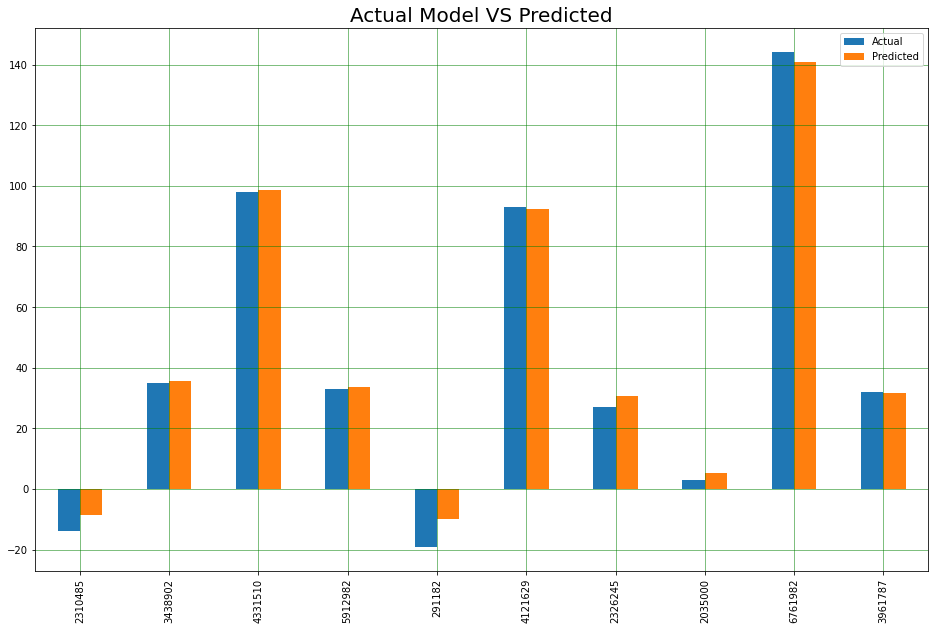

In [100]:
df_lasso = df_lasso.head(10)
df_lasso.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual Model VS Predicted', fontsize=20)
plt.show()

### Hyperparameters

In [118]:
#Setting the hyperparametres

params = {'alpha': [0.1,0.05,0]}
lasso = Lasso()

# instantiate the GridSearchCV object: lasso_grid

lasso_grid = GridSearchCV(lasso, params, cv = 3)

# Fit it to the data
lasso_grid.fit(X_train, y_train)

# # Predict on the test data: y_pred
y_pred = lasso_grid.predict(X_test)


# Print the tuned parameters and score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = lasso_grid.score(X_test,y_test)
print('R: ', r2)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.838e+07, tolerance: 2.918e+05
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.927e+07, tolerance: 2.919e+05
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

Mean Absolute Error: 2.7828349172040623
Mean Squared Error: 53.4884139397578
Root Mean Squared Error: 7.313577369506512
R:  0.98333302474469


As we can see our Models are quite precise since they were trained with a lot of data, therefore it allows us to predict our arrderlay in a very accurate way.
 The R2 of ours models are very high wich explain how good our X explain our Y in a scale of 0 to %100

## Compare the R2 and MSE Values:

In [129]:
# assign data of lists.  
datos = {'R^2':[r2_reg,r2_gs_rf,r2_lasso], 'MSE':[metrics.mean_squared_error(y_test, y_pred)]}  
  
# Creates pandas DataFrame.  
df_compare = pd.DataFrame(datos, index =['Linear_regression', 'Ridge_regression', 'Lasso_regression'])  
  
# print the dataframe
df_compare

,R^2,MSE
Linear_regression,0.983376,53.349946
Ridge_regression,0.991986,53.349946
Lasso_regression,0.983101,53.349946


___

# Cross Validation:

## Linear Regression


In [109]:
from sklearn.model_selection import cross_val_score
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(regressor,X,y,cv=5) 

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.98202239 0.98397238 0.98480121 0.98586797 0.97882747]
Average 5-Fold CV Score: 0.9830982823794103


## Random Forest


In [130]:
# Compute 5-fold cross-validation scores: cv_scores
rf_cv = cross_val_score(rf,X,y,cv=5) 

# Print the 5-fold cross-validation scores
print(rf_cv)

print("Average 5-Fold CV Score: {}".format(np.mean(rf_cv)))

[0.99297035 0.9935919  0.99387027 0.9932039  0.99259967]
Average 5-Fold CV Score: 0.9932472179358939


## Lasso

In [111]:

# Perform 5-fold cross-validation: lasso_cv
lasso_cv = cross_val_score(lasso,X,y,cv=5)

# Print the cross-validated scores
print(lasso_cv)

print("Average 5-Fold CV Score: {}".format(np.mean(lasso_cv)))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.044e+06, tolerance: 5.004e+05
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.525e+06, tolerance: 5.081e+05
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

[0.98193618 0.98356903 0.98441275 0.98559521 0.97801806]
Average 5-Fold CV Score: 0.9827062443106721


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.447e+06, tolerance: 4.918e+05
  model = cd_fast.enet_coordinate_descent(



## Conlusions : 

## -After making 3 different Regression models and comparing their results, we were able to discover that the three models are quite accurate, but the one that best fits is the Random Forest with an R2 of 0.99. The R2 explain how good our X explain our Y in a scale of 0 to %100, and our Root Mean Squared Error is expressed in minutes and explain that our predicted value have a deviation of 7.3 minutes from our real value. Our MSE is 53.3 measures the average of the squares of the errors.

## - Once we chose the models with which we were going to work, and evaluated them, we made some modifications in the hyperparameters of each model with GridSearch in order to improve the result obtained in each one of them, and thus know which combination of Hyperparameters is the most adequate.

## -Finally we did a Cross Validation in which each model is trained 5 times in order to reduce biases to a minimum and thus test it better. No significant changes were seen in the values ​​of R2, MSE, and RMSE, so we can conclude that our models fit the desired results quite well.